In [1]:
import sys
import parse as p
import author_network as an
import numpy as np
import networkx as nx
import graphviz as gv
from matplotlib import pyplot as plt
from community import community_louvain
import collections
p.parse_json('../data/icml2019.json')

In [2]:
temp, temp1 = p.get_paper_count()
authors = temp[0]
counts = temp[1]
sorted_authors = temp1[0]
sorted_counts = temp1[1]

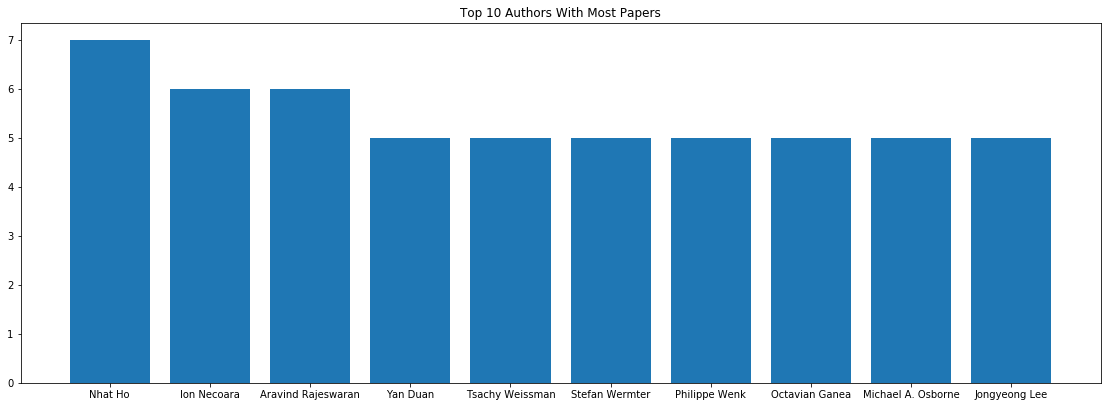

In [6]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_authors[:10],sorted_counts[:10], width = 0.8)
plt.title('Top 10 Authors With Most Papers')
plt.show()

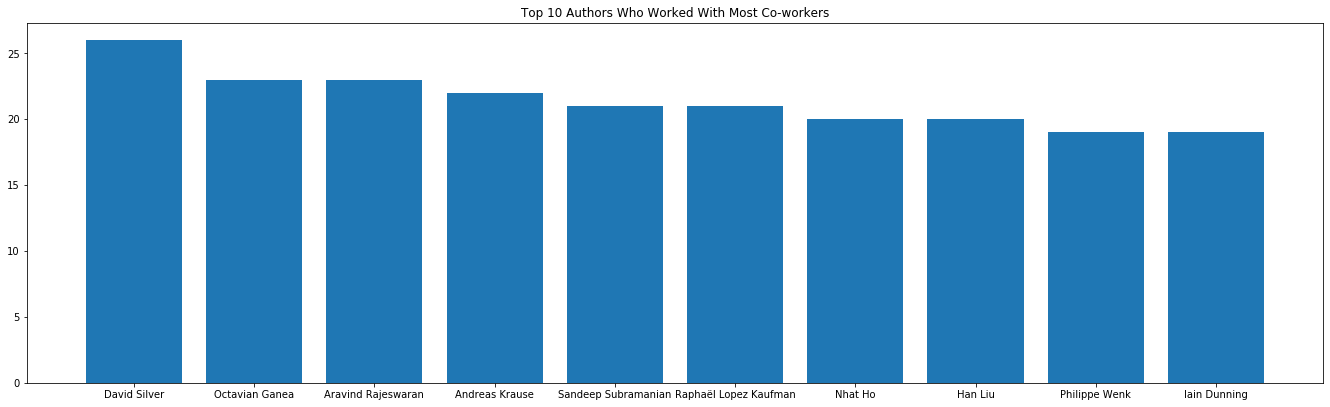

In [10]:
co_count_authors, co_counts = an.co_worker_counts()
fig = plt.figure(figsize=(18, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(co_count_authors[:10],co_counts[:10], width = 0.8)
plt.title('Top 10 Authors Who Worked With Most Co-workers')
plt.show()

In [11]:
edges = an.get_edges()
G = nx.MultiGraph()
G.add_edges_from(edges)
partition = community_louvain.best_partition(G)

In [12]:
values = [partition.get(node) for node in G.nodes()]
counter=collections.Counter(values)
print(counter)

Counter({109: 74, 7: 66, 0: 63, 23: 60, 2: 59, 5: 56, 123: 55, 122: 54, 30: 51, 25: 41, 74: 38, 69: 36, 224: 35, 12: 34, 3: 33, 83: 33, 24: 32, 35: 28, 84: 28, 15: 24, 42: 20, 4: 16, 212: 16, 58: 15, 143: 15, 219: 15, 99: 13, 10: 11, 22: 11, 31: 11, 44: 11, 64: 11, 78: 11, 130: 11, 37: 10, 67: 10, 104: 10, 246: 9, 249: 9, 53: 8, 61: 8, 79: 8, 80: 8, 92: 8, 95: 8, 117: 8, 126: 8, 183: 8, 196: 8, 225: 8, 262: 8, 348: 8, 366: 8, 32: 7, 33: 7, 76: 7, 134: 7, 137: 7, 173: 7, 174: 7, 178: 7, 179: 7, 198: 7, 317: 7, 332: 7, 336: 7, 8: 6, 9: 6, 13: 6, 17: 6, 20: 6, 68: 6, 98: 6, 102: 6, 121: 6, 133: 6, 138: 6, 141: 6, 146: 6, 187: 6, 201: 6, 203: 6, 215: 6, 230: 6, 255: 6, 333: 6, 350: 6, 367: 6, 370: 6, 1: 5, 6: 5, 14: 5, 16: 5, 28: 5, 34: 5, 45: 5, 47: 5, 56: 5, 62: 5, 90: 5, 93: 5, 103: 5, 106: 5, 113: 5, 118: 5, 127: 5, 135: 5, 142: 5, 147: 5, 149: 5, 151: 5, 164: 5, 185: 5, 190: 5, 195: 5, 220: 5, 240: 5, 256: 5, 270: 5, 272: 5, 274: 5, 277: 5, 280: 5, 302: 5, 304: 5, 315: 5, 319: 5, 323:

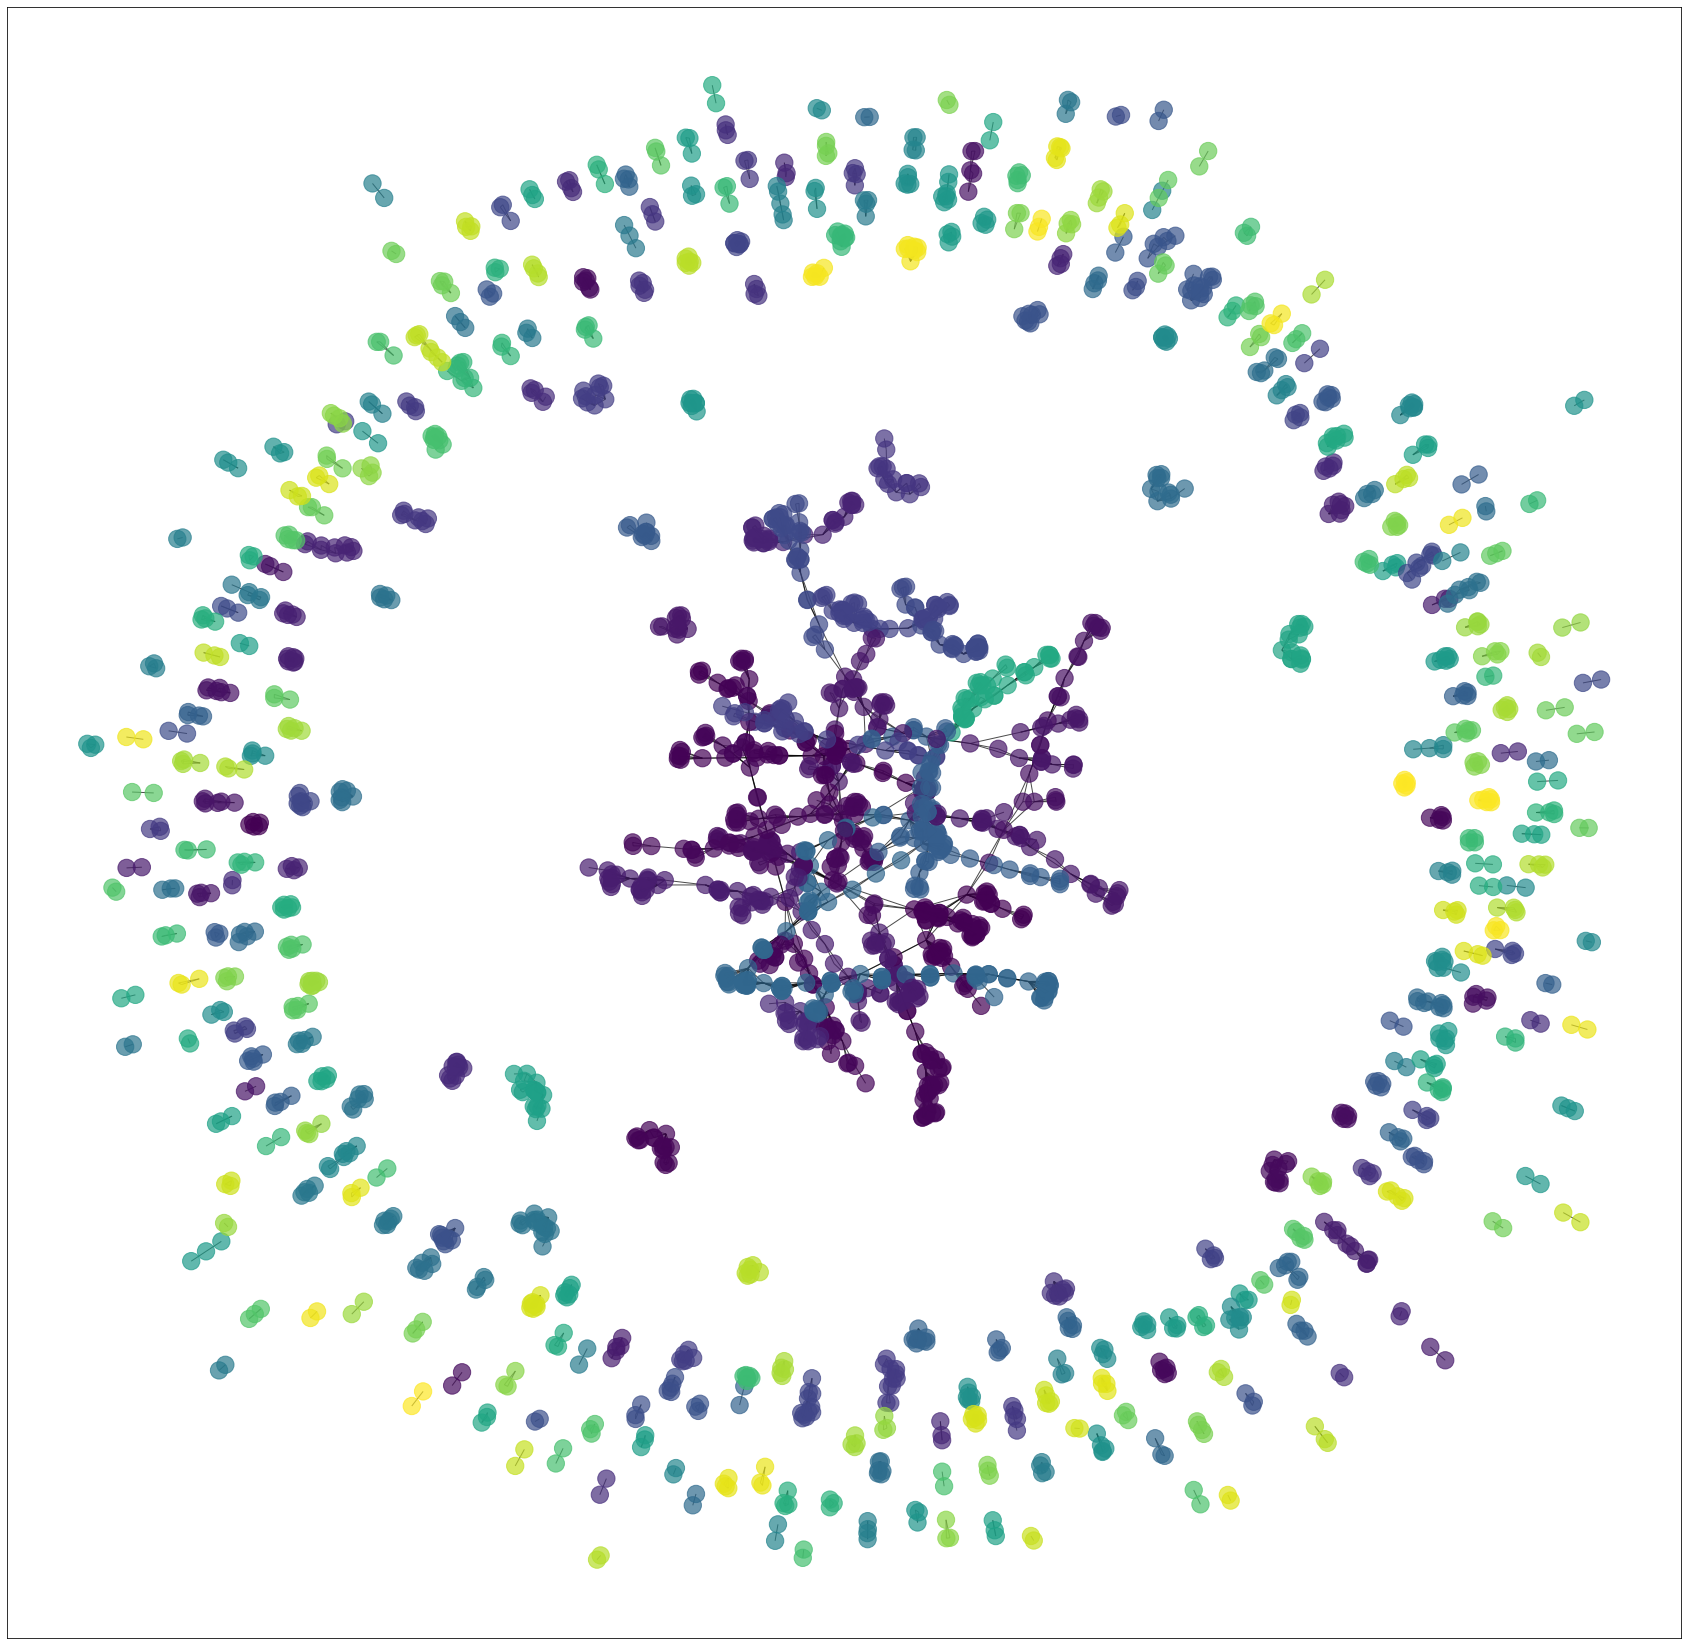

In [13]:
plt.figure(figsize =(30,30))
sp = nx.spring_layout(G)
node_size = [x for x in G.degree()]
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=300, node_color=values, alpha=0.7)
# plt.axes('off')
plt.show()

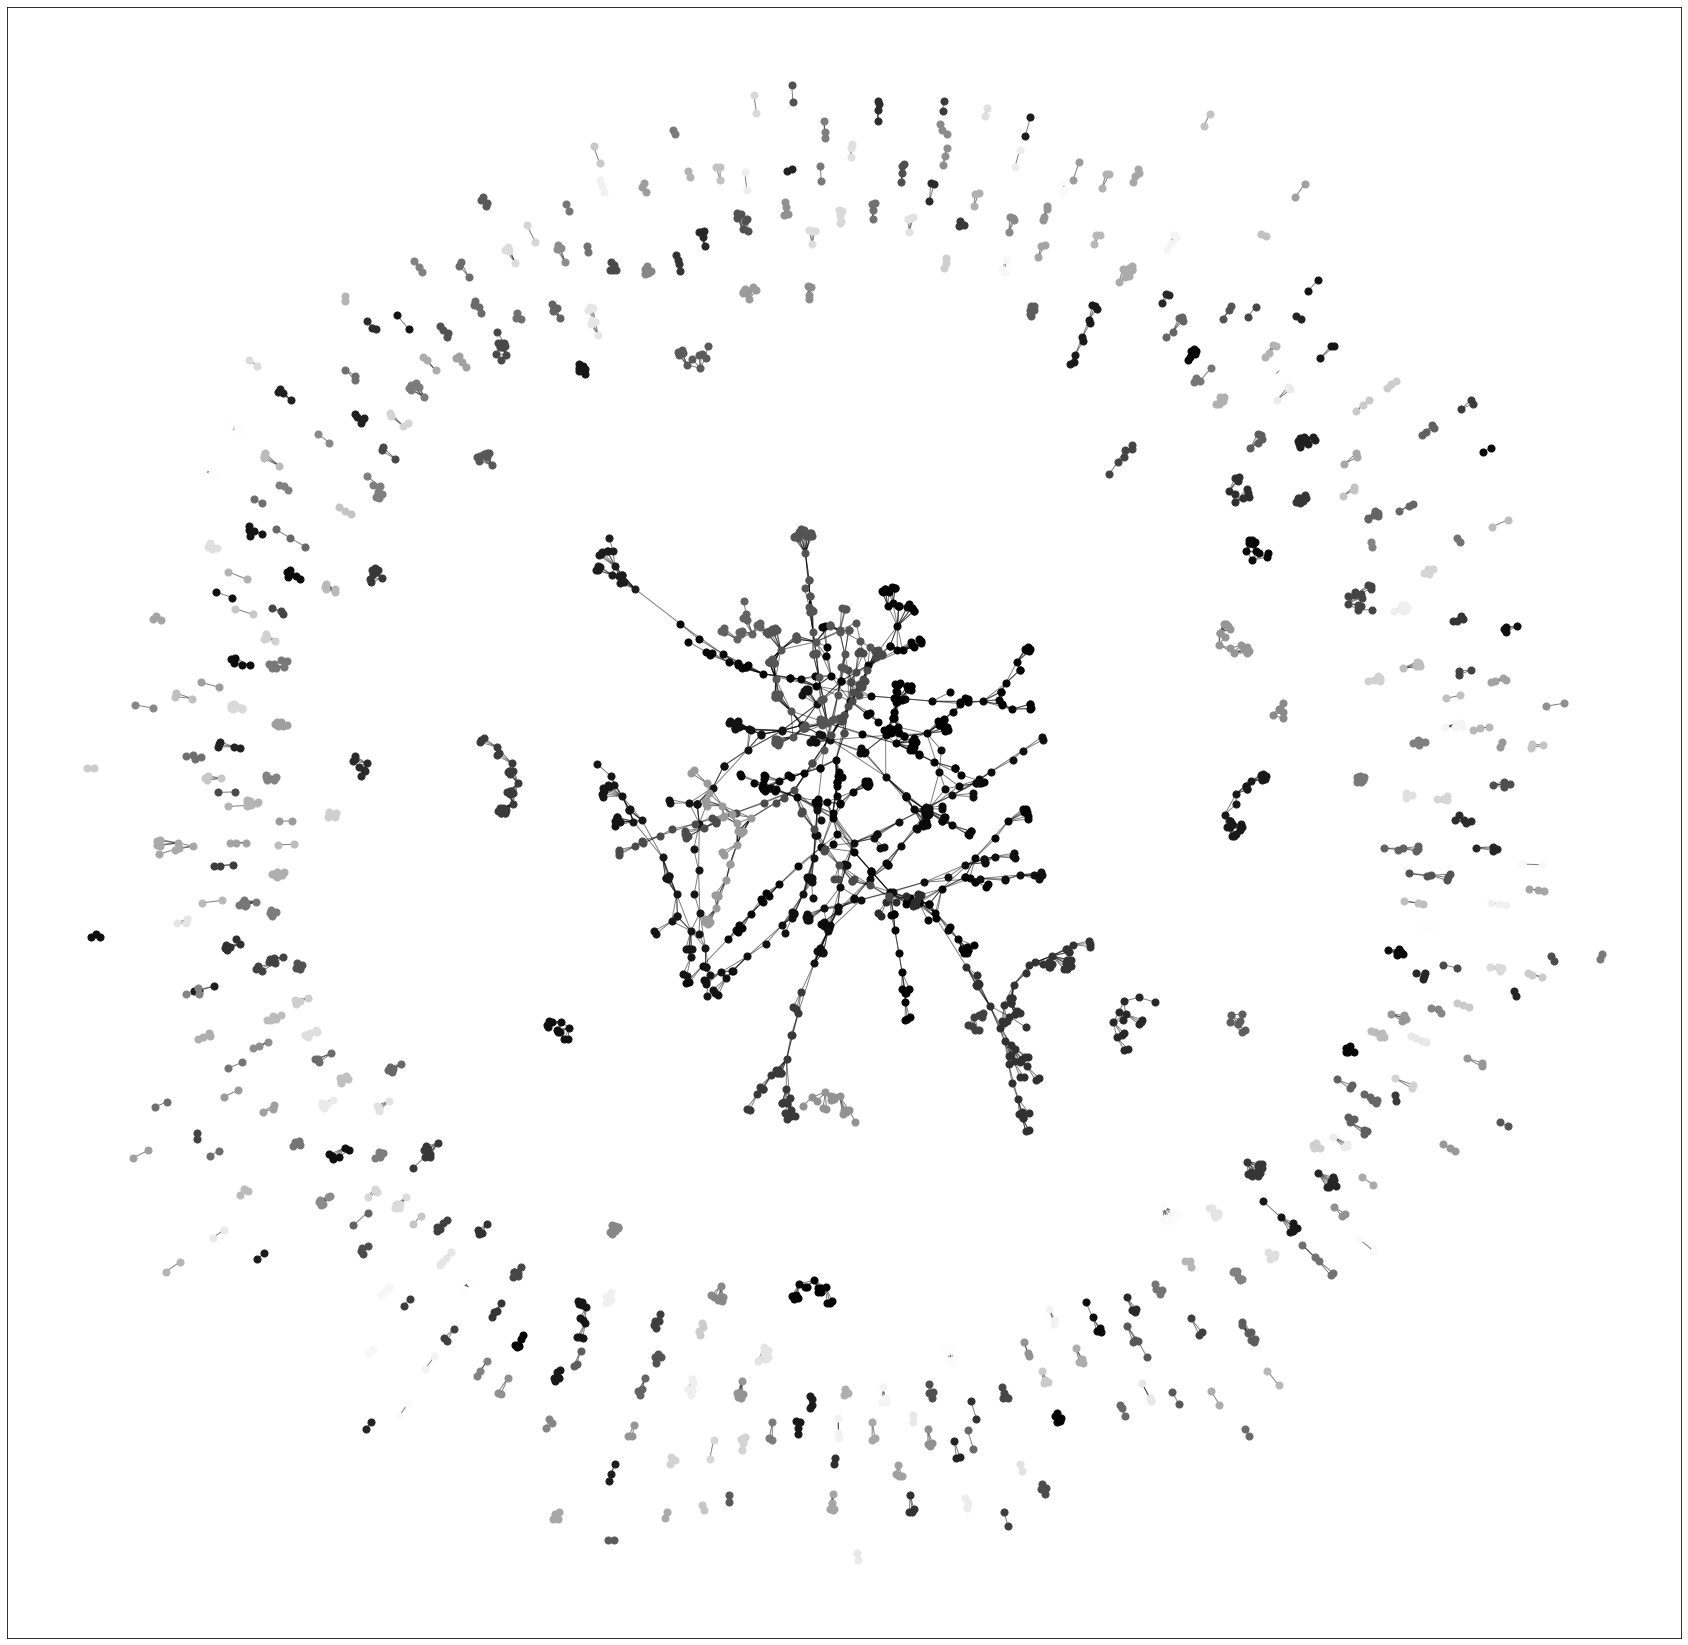

In [14]:
plt.figure(figsize =(30,30))

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50,
                                node_color = str(count / size),cmap = plt.cm.autumn)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

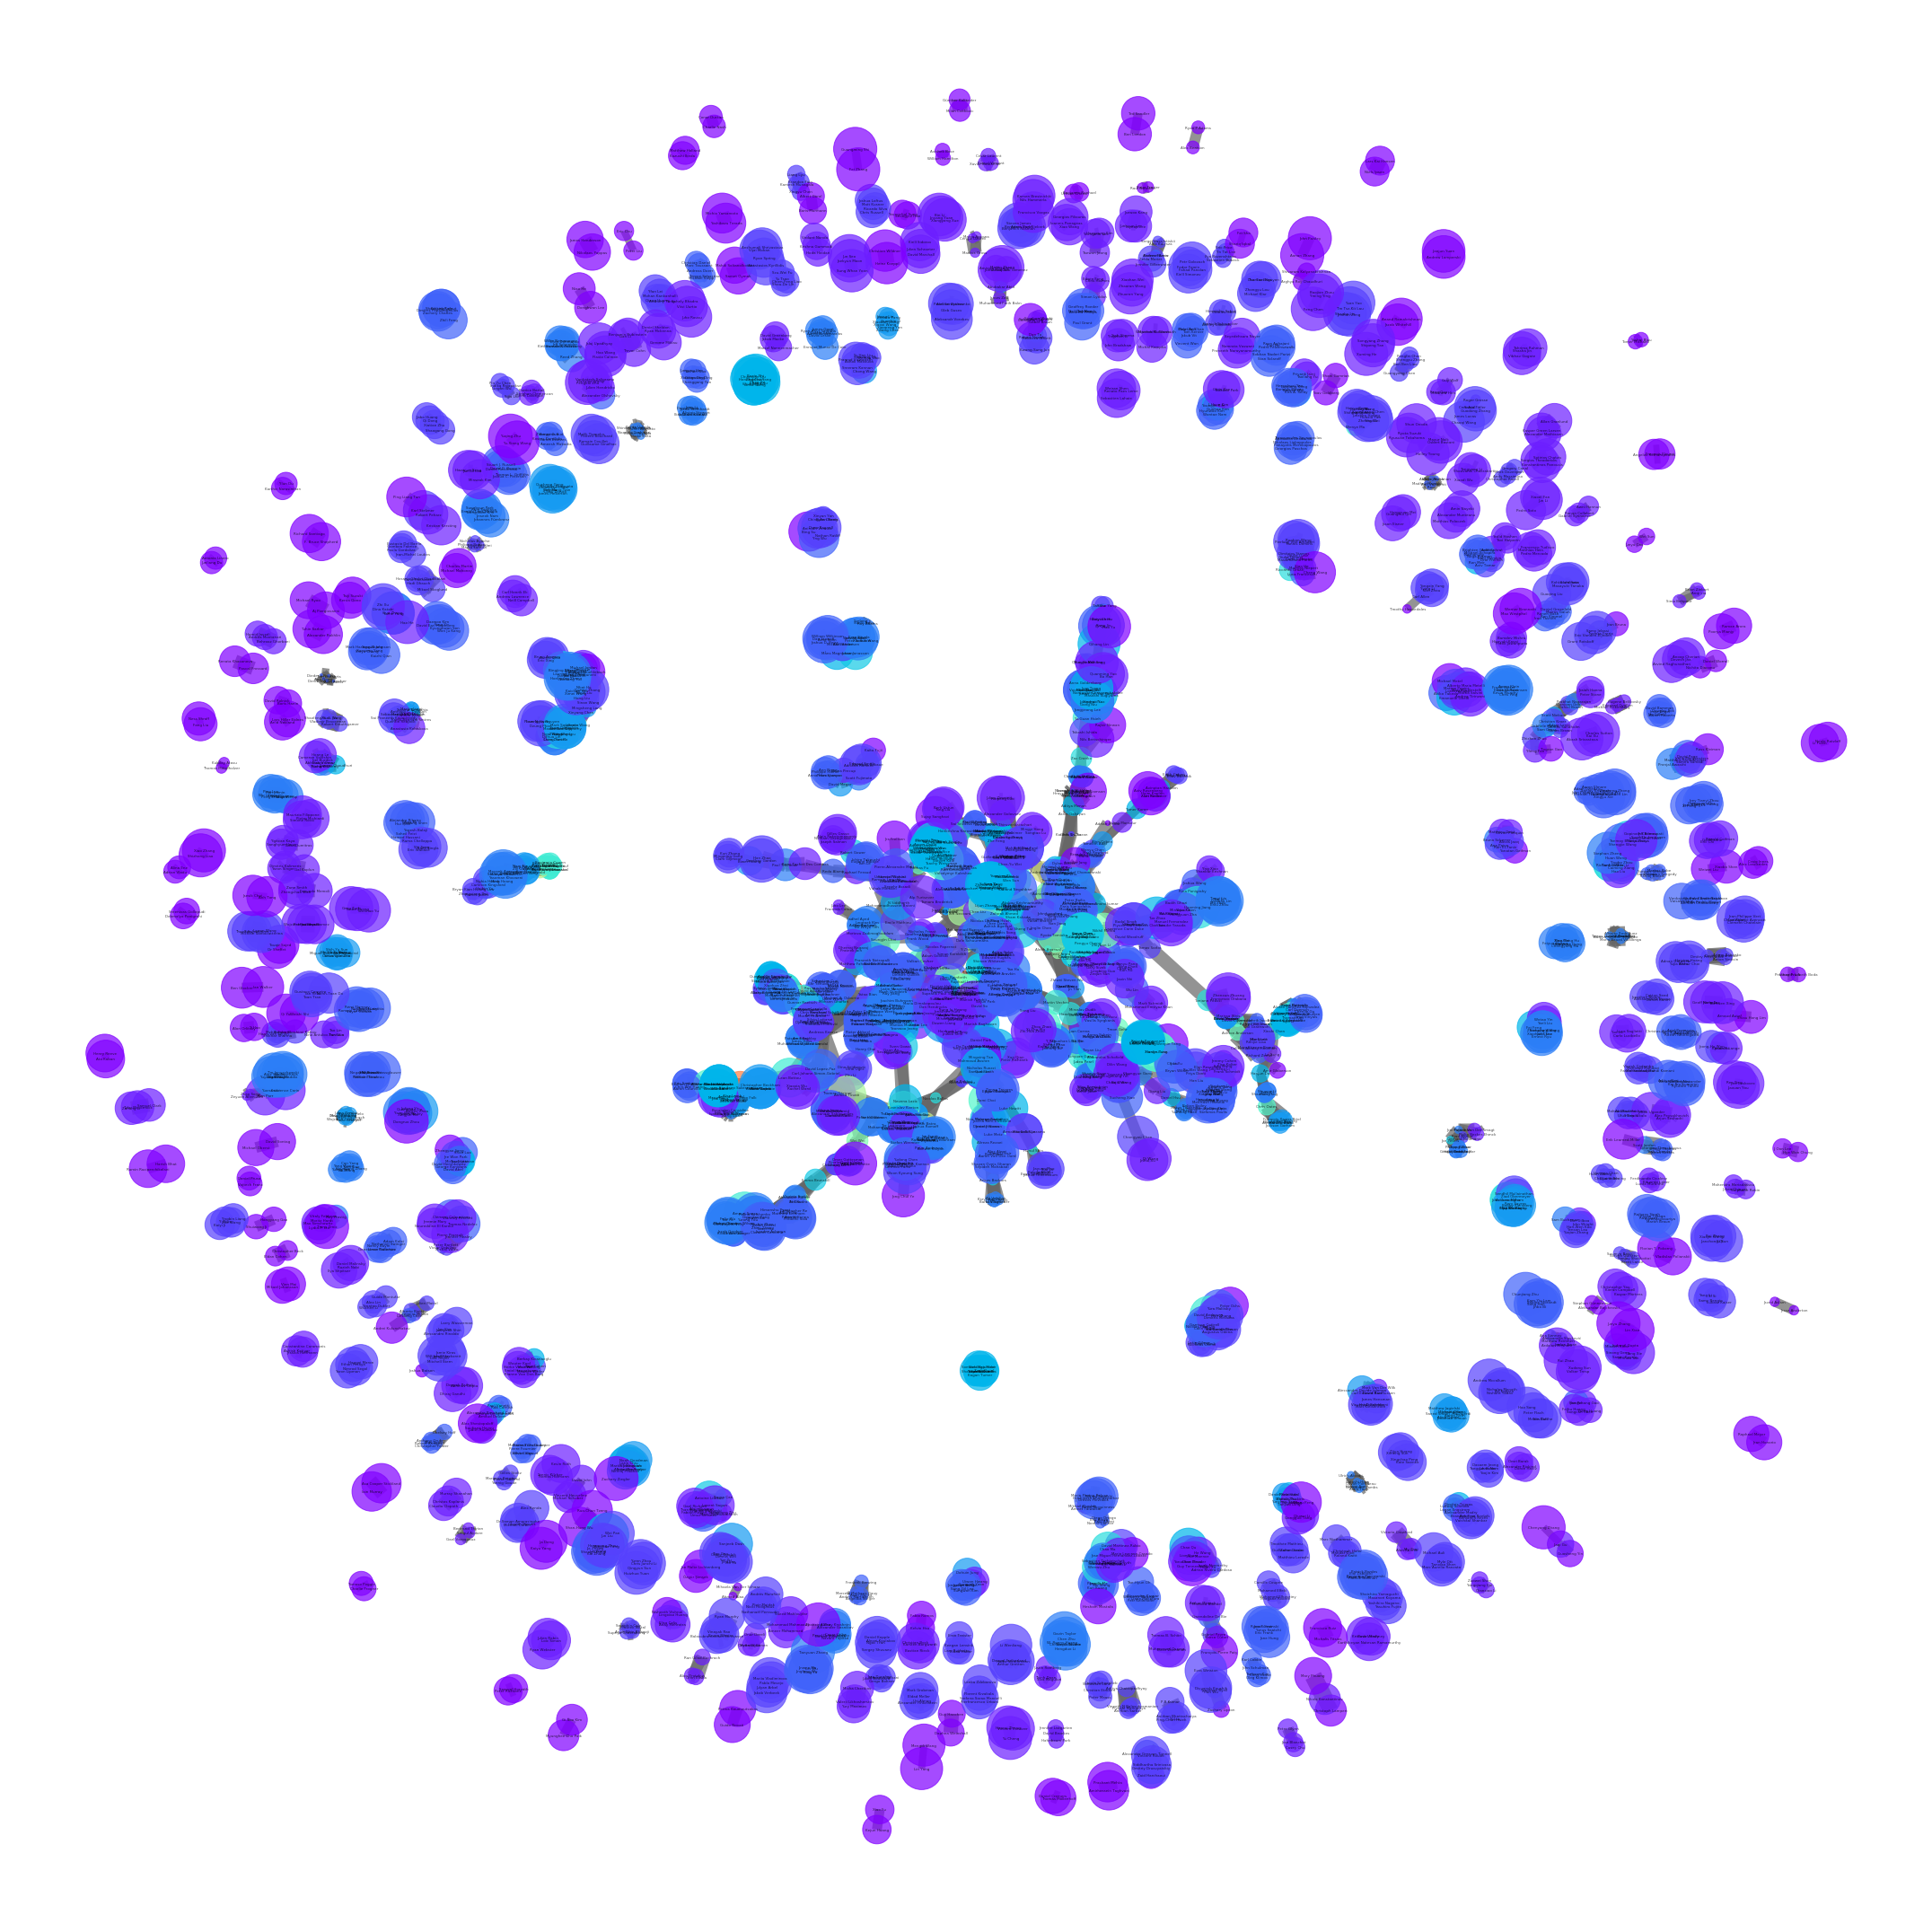

In [15]:
plt.figure(figsize =(30,30)) 
  
node_color = [G.degree(v)*0.001 for v in G] 
# node colour is a list of degrees of nodes 
  
# node_size = [0.0005 * nx.get_node_attributes(G, 'population')[v] for v in G] 
# size of node is a list of population of cities 
node_size = [i for i in range(len(authors))]

#edge_width = [0.0015 * G[u][v]['weight'] for u, v in G.edges()] 
# width of edge is a list of weight of edges 
edge_width = [len(u) for u, v in G.edges()]

'''
nx.draw_networkx(G, node_size = node_size,  
                 node_color = node_color, alpha = 0.7, 
                 with_labels = True, width = edge_width, 
                 edge_color ='.4', cmap = plt.cm.Blues) 
'''
nx.draw_networkx(G, node_size = node_size,  
                  node_color = node_color, alpha = 0.7, 
                 with_labels = True,font_size=4, width = edge_width, 
                 edge_color ='.4',cmap = plt.cm.rainbow) 
plt.axis('off') 
plt.tight_layout();

In [16]:
plt.figure(figsize=(30,30),dpi=400)
ax = plt.subplot(111)
pos = nx.spring_layout(G)
nd = nx.draw_networkx_nodes(G, pos,  node_size=100)
nd.set_edgecolor('w') #<- set the edgecolor to red on the node markers
nx.draw_networkx_edges(G,pos,linewidths=20)
#nx.draw_networkx_labels(G,pos,font_size=4)
plt.tick_params(
    axis='both',          # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    left='off',
    labelleft='off')
plt.show()
plt.savefig("authors.png")

<Figure size 432x288 with 0 Axes>

In [18]:
from node2vec import Node2Vec